<a href="https://colab.research.google.com/github/ahmedebeed555/deeplearning/blob/main/data3_final_updated_DL_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import libraries

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# import data


In [148]:
df=pd.read_csv('/content/drive/MyDrive/AI Sessions/data3.csv')
df.head(5)



,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [149]:
df_main_col=pd.DataFrame(df,columns=['GENRE','Gross','VOTES','RATING','RunTime'])
df_remove_col=pd.DataFrame(df,columns=['MOVIE','YEAR','STARS'])
df_remove_col.sample(5)#,df_main_col.head(5) ,df_main_col.tail(5)




,MOVIE,YEAR,STARS
4718,NaN,(2014),\n Director:\nSanne Vogel\n| \n Stars:\n...
3954,NaN,(2014),\n Director:\nAlex Merkin\n| \n Stars:\n...
4192,NaN,(I) (2009),\n Director:\nSteven Rumbelow\n| \n Star...
6658,NaN,(2018–2021),\n Director:\nBeth McCarthy-Miller\n| \n ...
5137,NaN,(2015),"\n Directors:\nHumberto Rosa, \nThairon Men..."


In [150]:
df_main_col

,GENRE,Gross,VOTES,RATING,RunTime
0,"\nAction, Horror, Thriller",NaN,"21,062",6.1,121.0
1,"\nAnimation, Action, Adventure",NaN,"17,870",5.0,25.0
2,"\nDrama, Horror, Thriller",NaN,"885,805",8.2,44.0
3,"\nAnimation, Adventure, Comedy",NaN,"414,849",9.2,23.0
4,"\nAction, Crime, Horror",NaN,NaN,NaN,NaN
...,...,...,...,...,...
9994,"\nAdventure, Drama, Fantasy",NaN,NaN,NaN,NaN
9995,"\nAnimation, Action, Adventure",NaN,NaN,NaN,NaN
9996,"\nDocumentary, Sport",NaN,NaN,NaN,NaN
9997,"\nAdventure, Drama, Fantasy",NaN,NaN,NaN,NaN


# Runtime VS Rating

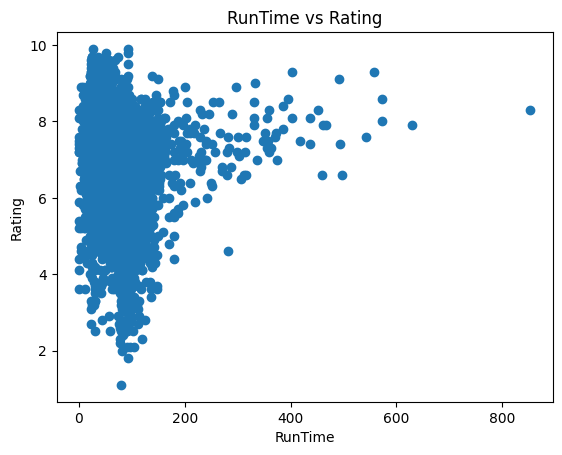

In [151]:
plt.title("RunTime vs Rating")
plt.xlabel("RunTime")
plt.ylabel("Rating")
plt.scatter(df_main_col['RunTime'],df_main_col['RATING'])
plt.show()

# Null Data in VOTES , RunTime , GENRE , RATING and Gross

In [152]:
df_main_col['VOTES'].isna().sum(),df_main_col['RunTime'].isna().sum(),df_main_col['Gross'].isna().sum(),df_main_col['GENRE'].isna().sum(),df_main_col['RATING'].isna().sum()

(np.int64(1820), np.int64(2958), np.int64(9539), np.int64(80), np.int64(1820))

# Remove commas from the 'VOTES' column and convert to numeric


In [153]:
# Remove commas from the 'VOTES' column and convert to numeric
df_main_col['VOTES'] = df_main_col['VOTES'].str.replace(',', '', regex=False)
df_main_col['VOTES'] = pd.to_numeric(df_main_col['VOTES'])

# Fill missing values in 'VOTES' with the mean
if df_main_col['VOTES'].isna().sum() > 0:
    df_main_col['VOTES'] = df_main_col['VOTES'].fillna(df_main_col['VOTES'].mean())

# Fill missing values in 'RATING' with the mean


In [154]:
# Fill missing values in 'RATING' with the mean
if df_main_col['RATING'].isna().sum() > 0:
    df_main_col['RATING'] = df_main_col['RATING'].fillna(df_main_col['RATING'].mean())

# Fill missing values in 'RunTime' with the mean


In [155]:
# Fill missing values in 'RunTime' with the mean
if df_main_col['RunTime'].isna().sum() > 0:
    df_main_col['RunTime'] = df_main_col['RunTime'].fillna(df_main_col['RunTime'].mean())

# Check Data After Filling

In [156]:
df_main_col.info(),df_main_col.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GENRE    9919 non-null   object 
 1   Gross    460 non-null    object 
 2   VOTES    9999 non-null   float64
 3   RATING   9999 non-null   float64
 4   RunTime  9999 non-null   float64
dtypes: float64(3), object(2)
memory usage: 390.7+ KB


(None,
               VOTES       RATING      RunTime
 count  9.999000e+03  9999.000000  9999.000000
 mean   1.512406e+04     6.921176    68.688539
 std    6.335830e+04     1.103594    39.655700
 min    5.000000e+00     1.100000     1.000000
 25%    2.430000e+02     6.500000    45.000000
 50%    1.550000e+03     6.921176    68.688539
 75%    1.512406e+04     7.600000    86.000000
 max    1.713028e+06     9.900000   853.000000)

# coun df_main_col nulls in all columns


In [157]:
# coun df_main_col nulls in all columns
df_main_col.isnull().sum()

,0
GENRE,80
Gross,9539
VOTES,0
RATING,0
RunTime,0


# coun df_main_col duplicates in all columns


In [158]:
# coun df_main_col duplicates in all columns
df_main_col.duplicated().sum()


np.int64(1540)

# Select only numeric columns for correlation calculation


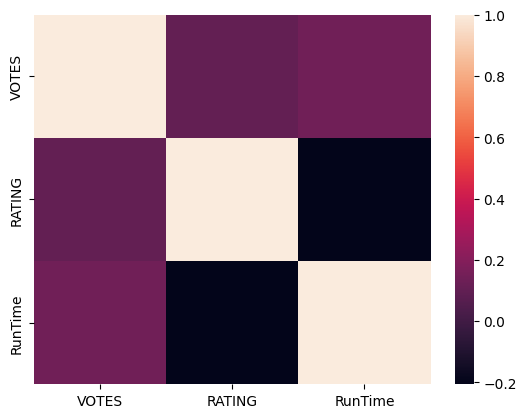

In [159]:
# Select only numeric columns for correlation calculation
numeric_df = df_main_col.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr())
plt.show()

# Votes vs Rating

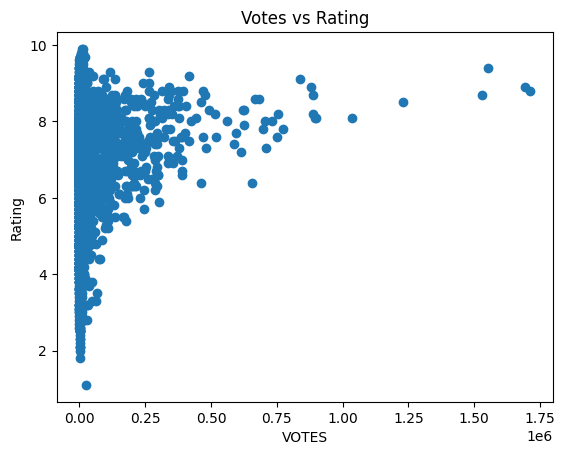

In [160]:
plt.title("Votes vs Rating")
plt.xlabel("VOTES")
plt.ylabel("Rating")
plt.scatter(df_main_col['VOTES'],df_main_col['RATING'])
plt.show()

# Check Data Count

In [161]:
df_main_col.head(5),df_main_col.sample(5),df_main_col.tail(5)

(                                        GENRE Gross          VOTES    RATING  \
 0      \nAction, Horror, Thriller               NaN   21062.000000  6.100000   
 1  \nAnimation, Action, Adventure               NaN   17870.000000  5.000000   
 2       \nDrama, Horror, Thriller               NaN  885805.000000  8.200000   
 3  \nAnimation, Adventure, Comedy               NaN  414849.000000  9.200000   
 4         \nAction, Crime, Horror               NaN   15124.062722  6.921176   
 
       RunTime  
 0  121.000000  
 1   25.000000  
 2   44.000000  
 3   23.000000  
 4   68.688539  ,
                                       GENRE Gross         VOTES    RATING  \
 8358             \nCrime, Drama               NaN  15124.062722  6.921176   
 3191            \nDrama, Sci-Fi               NaN   1210.000000  7.100000   
 4530              \nDocumentary               NaN   2141.000000  6.200000   
 6252                  \nWestern               NaN  15124.062722  6.921176   
 434   \nBiography,

In [162]:
if df_main_col['GENRE'].isna().sum() > 0:
    df_main_col = df_main_col.dropna(subset=['GENRE'])


# Check Data in GENRE

In [163]:
df_main_col['GENRE'].isna().sum()

np.int64(0)

# Check

In [164]:
df_main_col.head(5)

,GENRE,Gross,VOTES,RATING,RunTime
0,"\nAction, Horror, Thriller",NaN,21062.000000,6.100000,121.000000
1,"\nAnimation, Action, Adventure",NaN,17870.000000,5.000000,25.000000
2,"\nDrama, Horror, Thriller",NaN,885805.000000,8.200000,44.000000
3,"\nAnimation, Adventure, Comedy",NaN,414849.000000,9.200000,23.000000
4,"\nAction, Crime, Horror",NaN,15124.062722,6.921176,68.688539


# Select only numeric columns for correlation calculation


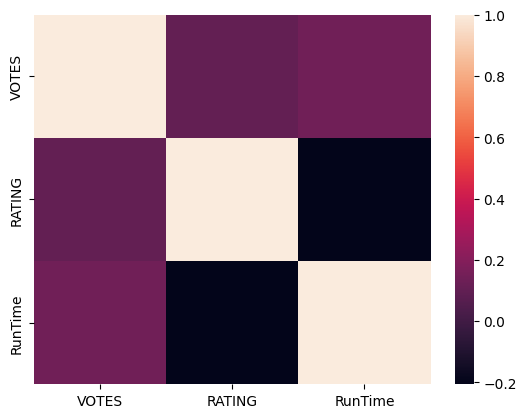

In [165]:
# Select only numeric columns for correlation calculation
numeric_df = df_main_col.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr())
plt.show()

#Votes vs RunTime

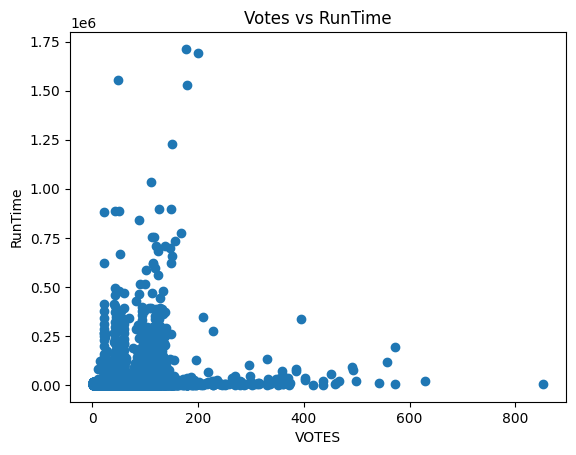

In [166]:
plt.title("Votes vs RunTime")
plt.xlabel("VOTES")
plt.ylabel("RunTime")
plt.scatter(df_main_col['RunTime'],df_main_col['VOTES'])
plt.show()

# Select rows where 'Gross' is NaN


In [167]:
# Select rows where 'Gross' is NaN
gross_nan_rows = df_main_col[df_main_col['Gross'].isna()]

# Display a sample of these rows
if not gross_nan_rows.empty:
    display(gross_nan_rows.sample(min(5, len(gross_nan_rows))))
else:
    print("No missing values in the 'Gross' column.")

,GENRE,Gross,VOTES,RATING,RunTime
9768,"\nGame-Show, Reality-TV",NaN,77.0,7.3,53.0
9582,"\nAnimation, Action, Adventure",NaN,541.0,8.3,26.0
6133,"\nDocumentary, Comedy",NaN,397.0,7.8,90.0
296,"\nComedy, Drama",NaN,91972.0,8.4,30.0
3993,\nDrama,NaN,677.0,6.1,89.0


# Display Gross Filled Rows

In [168]:
gross_filled_rows = df_main_col[df_main_col['Gross'].notna()]
display(gross_filled_rows.sample(min(5, len(gross_filled_rows))))

,GENRE,Gross,VOTES,RATING,RunTime
428,\nDrama,$27.85M,285273.0,7.4,111.0
2822,"\nAction, Comedy, Drama",$0.10M,8169.0,5.6,92.0
4242,"\nDocumentary, Drama",$0.11M,2386.0,7.4,102.0
5197,"\nDocumentary, Action, Biography",$0.12M,562.0,6.2,90.0
1379,"\nAnimation, Adventure, Drama",$1.34M,58668.0,7.7,108.0


# Clean the 'Gross' column by removing '$' and 'M' and convert to numeric


In [169]:
# Clean the 'Gross' column by removing '$' and 'M' and convert to numeric
gross_filled_rows['Gross'] = gross_filled_rows['Gross'].astype(str).str.replace('[$,M]', '', regex=True)
gross_filled_rows['Gross'] = pd.to_numeric(gross_filled_rows['Gross'])

# Calculate and display describe() and mean()
display(gross_filled_rows['Gross'].describe())
display(gross_filled_rows['Gross'].mean())

,Gross
count,460.000000
mean,43.701870
std,82.423304
min,0.000000
25%,0.150000
50%,6.145000
75%,46.947500
max,504.010000


np.float64(43.701869565217386)

# Save Originally_gross_filled_rows

In [170]:
Originally_gross_filled_rows = df_main_col[df_main_col['Gross'].notna()]

Originally_gross_filled_rows['Gross'].describe()

,Gross
count,460
unique,332
top,$0.01M
freq,22


#Rate Variable = ( GROSS FILLED ) / ( GROSS FILLED (VOTES)mean * GROSS FILLED (ٌِRATING)mean * GROSS FILLED (RunTime)mean )

In [171]:
rate_gross_per_votes=gross_filled_rows['Gross']/(gross_filled_rows['VOTES']*gross_filled_rows['RATING'])*gross_filled_rows['RunTime']
rate_gross_per_votes.mean(),gross_filled_rows['Gross'].mean()
rate=rate_gross_per_votes.mean()
rate

np.float64(0.006876897737289313)

# Missing Gross Data Reconstruction

In [172]:
df_main_col['Gross'] = df_main_col['Gross'].fillna(rate*df_main_col['VOTES'])
df_main_col['Gross'].isna().sum()

np.int64(0)

# DATA Check

In [173]:
df_main_col.head(5)#,df_main_col.sample(5),df_main_col.tail(5)

,GENRE,Gross,VOTES,RATING,RunTime
0,"\nAction, Horror, Thriller",144.84122,21062.000000,6.100000,121.000000
1,"\nAnimation, Action, Adventure",122.890163,17870.000000,5.000000,25.000000
2,"\nDrama, Horror, Thriller",6091.5904,885805.000000,8.200000,44.000000
3,"\nAnimation, Adventure, Comedy",2852.874149,414849.000000,9.200000,23.000000
4,"\nAction, Crime, Horror",104.006633,15124.062722,6.921176,68.688539


# Clean the 'Gross' column by removing '$' and 'M' and convert to numeric


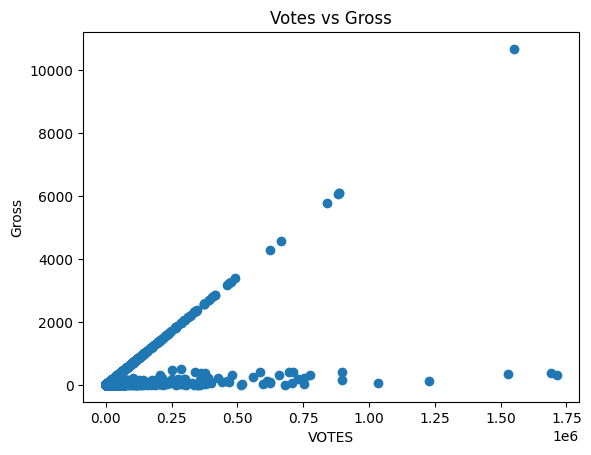

In [174]:
# Clean the 'Gross' column by removing '$' and 'M' and convert to numeric
df_main_col['Gross'] = df_main_col['Gross'].astype(str).str.replace('[$,M]', '', regex=True)
df_main_col['Gross'] = pd.to_numeric(df_main_col['Gross'])

# Fill missing values in 'Gross' using the calculated rate
if df_main_col['Gross'].isna().sum() > 0:
    df_main_col['Gross'] = df_main_col['Gross'].fillna(rate*df_main_col['VOTES'])

plt.title("Votes vs Gross")
plt.xlabel("VOTES")
plt.ylabel("Gross")
plt.scatter(df_main_col['VOTES'],df_main_col['Gross'])
plt.show()

# RATING VS GROSS

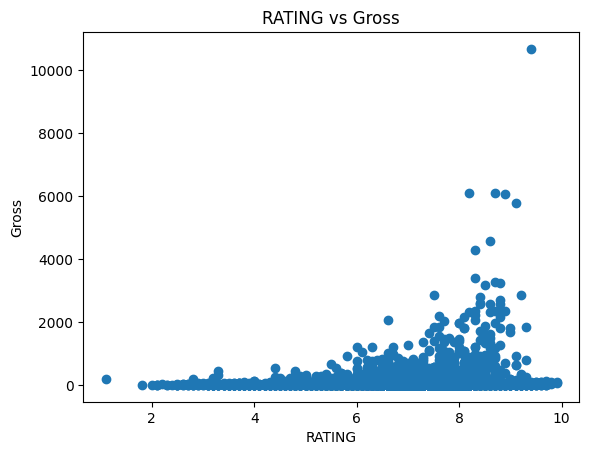

In [175]:
plt.title("RATING vs Gross")
plt.xlabel("RATING")
plt.ylabel("Gross")
plt.scatter(df_main_col['RATING'],df_main_col['Gross'])
plt.show()

#RATING VS Votes

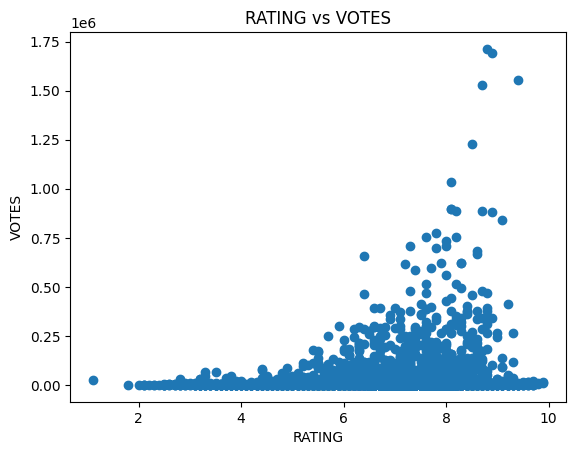

In [176]:
plt.title("RATING vs VOTES")
plt.xlabel("RATING")
plt.ylabel("VOTES")
plt.scatter(df_main_col['RATING'],df_main_col['VOTES'])
plt.show()

#RunTime vs Gross

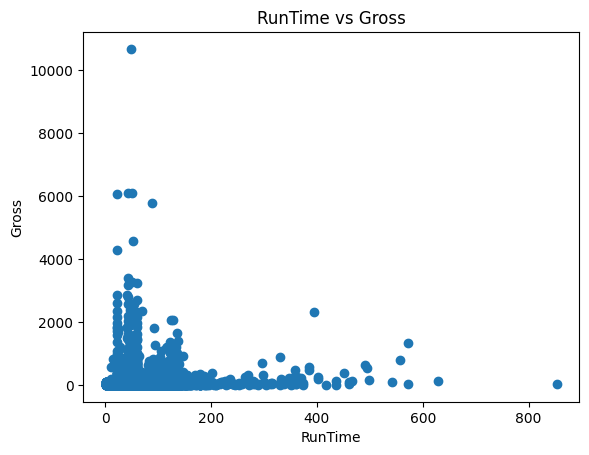

In [177]:
plt.title("RunTime vs Gross")
plt.xlabel("RunTime")
plt.ylabel("Gross")
plt.scatter(df_main_col['RunTime'],df_main_col['Gross'])
plt.show()

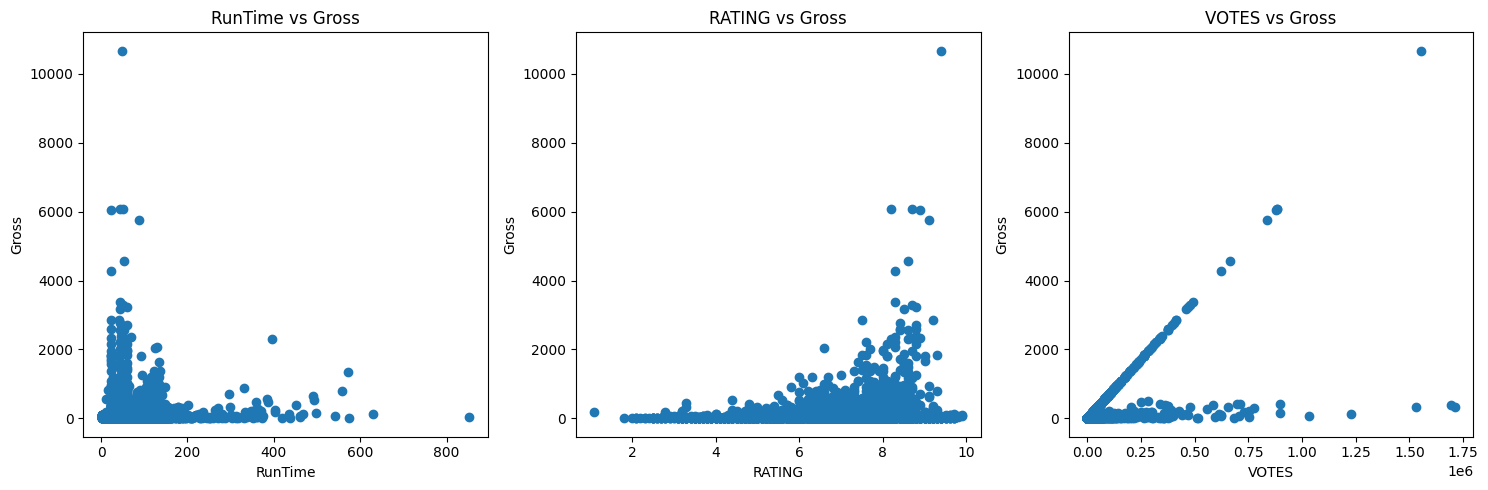

In [178]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("RunTime vs Gross")
plt.xlabel("RunTime")
plt.ylabel("Gross")
plt.scatter(df_main_col['RunTime'],df_main_col['Gross'])

plt.subplot(1, 3, 2)
plt.title("RATING vs Gross")
plt.xlabel("RATING")
plt.ylabel("Gross")
plt.scatter(df_main_col['RATING'],df_main_col['Gross'])

plt.subplot(1, 3, 3)
plt.title("VOTES vs Gross")
plt.xlabel("VOTES")
plt.ylabel("Gross")
plt.scatter(df_main_col['VOTES'],df_main_col['Gross'])

plt.tight_layout()
plt.show()

# Import

In [179]:
from sklearn.model_selection import train_test_split
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import kmeans_plusplus
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix, f1_score, accuracy_score

#DATA Split

In [180]:
x_train,x_test,y_train,y_test=train_test_split(df_main_col[['VOTES','RATING','RunTime']],df_main_col['Gross'],test_size=0.2,random_state=42)

# Random Forest ML Model

In [181]:
m1=RandomForestRegressor(n_estimators=500,random_state=42)
m1.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

# Prediction

In [182]:
y_pred=m1.predict(x_test)
r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred)


(0.9082341659265062, 5561.302744505409)

#Accuracy

In [183]:
accuracy=m1.score(x_test,y_test)
accuracy

0.9082341659265062

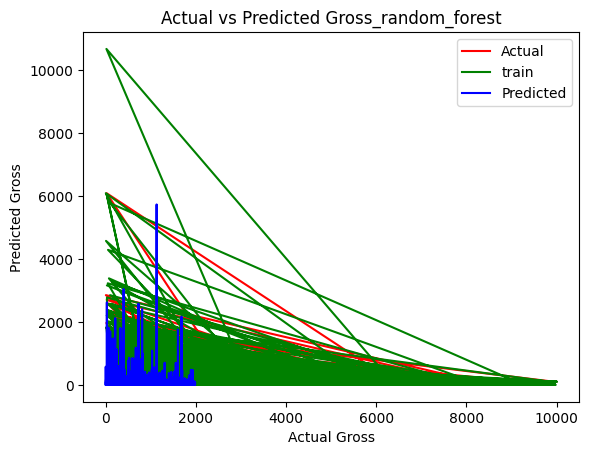

In [184]:
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_train,color='green',label='train')
plt.plot( y_pred, color='blue', label='Predicted')
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs Predicted Gross_random_forest")
plt.legend()
plt.show()

#Linear Regression ML Model

In [185]:
from sklearn.linear_model import LinearRegression
m2=LinearRegression()
m2.fit(x_train,y_train)

LinearRegression()

#Predict

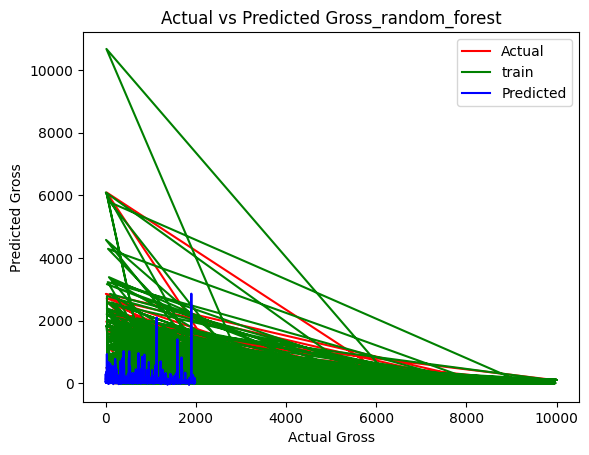

In [186]:
y_pred2 = m2.predict(x_test)
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_train,color='green',label='train')
plt.plot( y_pred2, color='blue', label='Predicted')
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs Predicted Gross_random_forest")
plt.legend()
plt.show()

#Accuracy

In [187]:
accuracy=m2.score(x_test,y_test)
accuracy,r2_score(y_test,y_pred2),mean_squared_error(y_test,y_pred)

(0.434638642314105, 0.434638642314105, 5561.302744505409)

# SVR ML Model

In [188]:
from sklearn.svm import SVR
m3=SVR()
m3.fit(x_train,y_train)

SVR()

#Predict

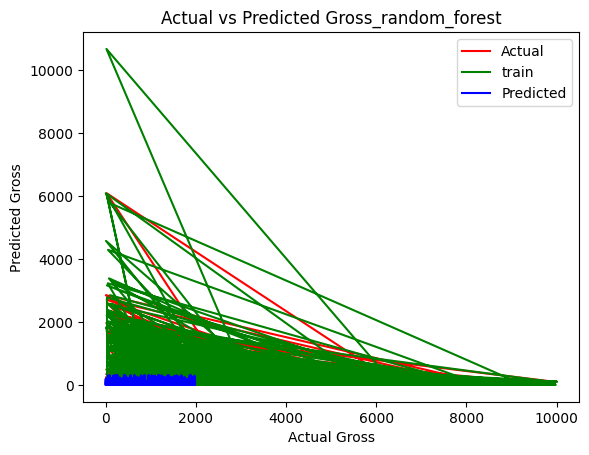

In [189]:
y_pred3 = m3.predict(x_test)
plt.plot(y_test, color='red', label='Actual')
plt.plot(y_train,color='green',label='train')
plt.plot( y_pred3, color='blue', label='Predicted')
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs Predicted Gross_random_forest")
plt.legend()
plt.show()

#accuracy


In [190]:
#accuracy
accuracy=m3.score(x_test,y_test)
accuracy,r2_score(y_test,y_pred3),mean_squared_error(y_test,y_pred)

(0.13914745462452582, 0.13914745462452582, 5561.302744505409)

# Deep Learning Model ReLU 3 input features , layer 6 , layer 6 , output 1 , 200 epoch


Epoch 1/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 82474.6562  
Epoch 2/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51572.2812  
Epoch 3/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 56771.7891  
Epoch 4/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68186.6328
Epoch 5/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 58087.6367
Epoch 6/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50553.3281
Epoch 7/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34707.8633
Epoch 8/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54588.7500
Epoch 9/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53455.0039
Epoch 10/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44750.0391
Epoch 11/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85541.5391
Epoch 12/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65722.7812
Epoch 13/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 108117.2500
Epoch 14/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

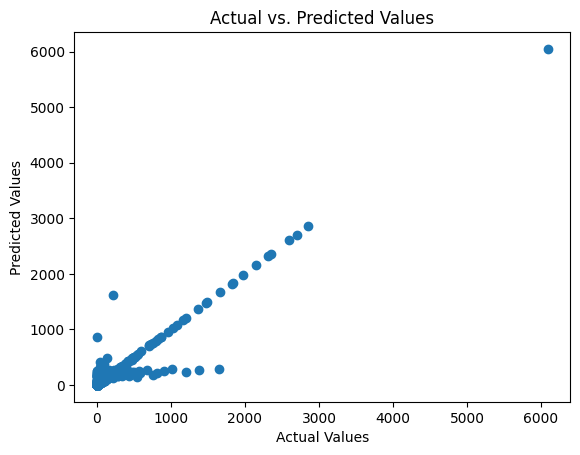

In [191]:
# Deep Learning Model ReLU 3 input features , layer 6 , layer 6 , output 1 , 200 epoch
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# ReLU
model = Sequential()
model.add(Dense(6, input_dim=3, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
# StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
#History
history = model.fit(x_train_scaled, y_train, epochs=200, batch_size=32, verbose=1)
# Predict
y_pred = model.predict(x_test_scaled)
# MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#  visulaization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Deep Learning Model ReLU 3 input features , layer 6 , layer 4 , output 1 , 200 epoch


Epoch 1/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 44088.5430
Epoch 2/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50025.4414
Epoch 3/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 76446.6484
Epoch 4/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 67030.0703
Epoch 5/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54397.6953
Epoch 6/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49211.9453
Epoch 7/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65810.7188
Epoch 8/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 57393.9062
Epoch 9/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 73485.0000
Epoch 10/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 77891.2578
Epoch 11/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66134.7031
Epoch 12/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47355.1719
Epoch 13/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49640.0859  
Epoch 14/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - lo

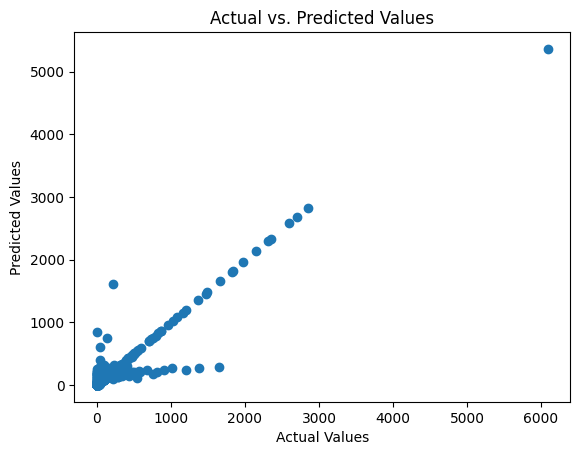

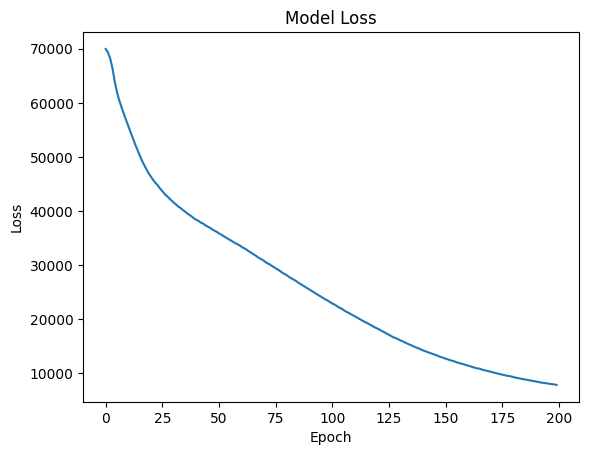

In [192]:
# Deep Learning Model ReLU 3 input features , layer 6 , layer 4 , output 1 , 200 epoch
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# ReLU
model = Sequential()
model.add(Dense(6, input_dim=3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error', optimizer='adam')
# StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# History
history = model.fit(x_train_scaled, y_train, epochs=200, batch_size=32, verbose=1)
# Predict
y_pred = model.predict(x_test_scaled)
# MSR , R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#  visulaization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# deep learning curve
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


# deep learning model linear regression 3 input layer 6 , layer 6 , 1 output , 200 epoch



Epoch 1/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 75043.2734
Epoch 2/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 63972.0430
Epoch 3/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96064.5469
Epoch 4/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52620.4805
Epoch 5/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55535.2422
Epoch 6/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40690.5352
Epoch 7/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48590.4961
Epoch 8/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65293.0820
Epoch 9/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45948.7422
Epoch 10/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64166.2656
Epoch 11/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 44411.2461
Epoch 12/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51928.6250
Epoch 13/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54399.5195
Epoch 14/200
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

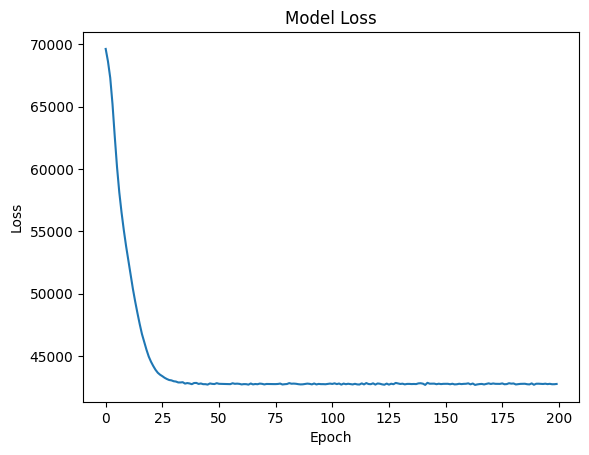

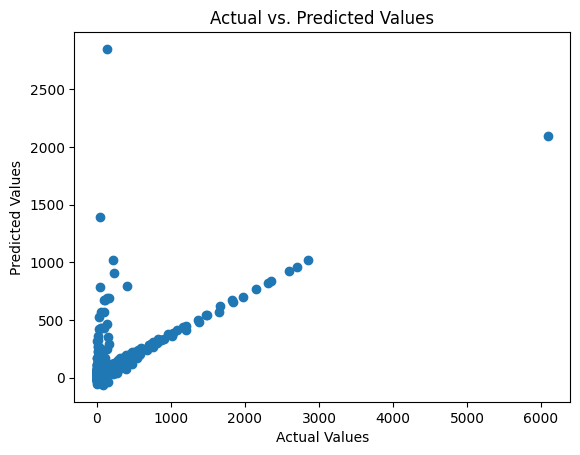

In [193]:
# deep learning model linear regression 3 input layer 6 , layer 6 , 1 output , 200 epoch
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# linear regression

model = Sequential()
model.add(Dense(6, input_dim=3, activation='linear'))
model
model.add(Dense(6, activation='linear'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
# StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# history

history = model.fit(x_train_scaled, y_train, epochs=200, batch_size=32, verbose=1)
# Predict
y_pred = model.predict(x_test_scaled)
# MSE , R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
# learning curve
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#  visulaization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()




# Extra Verification and Validation


In [194]:
Originally_gross_filled_rows['Gross'].describe()

,Gross
count,460
unique,332
top,$0.01M
freq,22


In [195]:
df_main_col[df_main_col['Gross'].notna()]


,GENRE,Gross,VOTES,RATING,RunTime
0,"\nAction, Horror, Thriller",144.841220,21062.000000,6.100000,121.000000
1,"\nAnimation, Action, Adventure",122.890163,17870.000000,5.000000,25.000000
2,"\nDrama, Horror, Thriller",6091.590400,885805.000000,8.200000,44.000000
3,"\nAnimation, Adventure, Comedy",2852.874149,414849.000000,9.200000,23.000000
4,"\nAction, Crime, Horror",104.006633,15124.062722,6.921176,68.688539
...,...,...,...,...,...
9994,"\nAdventure, Drama, Fantasy",104.006633,15124.062722,6.921176,68.688539
9995,"\nAnimation, Action, Adventure",104.006633,15124.062722,6.921176,68.688539
9996,"\nDocumentary, Sport",104.006633,15124.062722,6.921176,68.688539
9997,"\nAdventure, Drama, Fantasy",104.006633,15124.062722,6.921176,68.688539


In [196]:
Originally_gross_filled_rows

,GENRE,Gross,VOTES,RATING,RunTime
77,"\nAction, Comedy, Crime",$75.47M,205979.0,6.9,118.0
85,"\nAction, Adventure, Sci-Fi",$402.45M,897444.0,8.1,127.0
95,"\nCrime, Horror, Thriller",$89.22M,237601.0,7.1,88.0
111,"\nAction, Adventure, Drama",$315.54M,1713028.0,8.8,178.0
125,"\nAction, Adventure, Horror",$57.01M,99351.0,6.4,99.0
...,...,...,...,...,...
5750,\nDocumentary,$0.09M,245.0,6.5,90.0
5770,"\nDocumentary, Mystery",$0.00M,331.0,6.3,75.0
5835,\nDocumentary,$0.01M,124.0,5.5,83.0
6056,\nDocumentary,$0.01M,111.0,6.8,86.0


In [197]:
Originally_gross_filled_rows['Gross'].describe()


,Gross
count,460
unique,332
top,$0.01M
freq,22


In [198]:
Originally_gross_filled_rows['Gross']


,Gross
77,$75.47M
85,$402.45M
95,$89.22M
111,$315.54M
125,$57.01M
...,...
5750,$0.09M
5770,$0.00M
5835,$0.01M
6056,$0.01M


In [199]:
# Clean the 'Gross' column by removing '$' and 'M' and convert to numeric
Originally_gross_filled_rows['Gross'] = Originally_gross_filled_rows['Gross'].astype(str).str.replace('[$,M]', '', regex=True)
Originally_gross_filled_rows['Gross']


,Gross
77,75.47
85,402.45
95,89.22
111,315.54
125,57.01
...,...
5750,0.09
5770,0.00
5835,0.01
6056,0.01


In [200]:
# make train test split data from Originally_gross_filled_rows
x_train_original , x_test_original , y_train_original , y_test_original = train_test_split(Originally_gross_filled_rows[['VOTES','RATING','RunTime']],Originally_gross_filled_rows['Gross'],test_size=0.2,random_state=42)

# Random Forest ML Model on Originall_gross_filled_rows

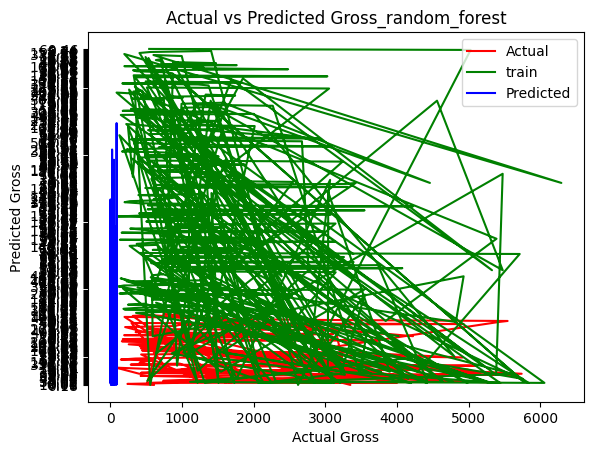

In [201]:
# Random Forest ML Model on Originall_gross_filled_rows
m1_original=RandomForestRegressor(n_estimators=200,random_state=42)
m1_original.fit(x_train_original,y_train_original)
# Predict
y_pred_original=m1_original.predict(x_test_original)
r2_score(y_test_original,y_pred_original),mean_squared_error(y_test_original,y_pred_original)
#
accuracy=m1_original.score(x_test_original,y_test_original)
accuracy
#
plt.plot(y_test_original, color='red', label='Actual')
plt.plot(y_train_original,color='green',label='train')
plt.plot( y_pred_original, color='blue', label='Predicted')
#
plt.xlabel("Actual Gross")
plt.ylabel("Predicted Gross")
plt.title("Actual vs Predicted Gross_random_forest")
plt.legend()
plt.show()
#



In [202]:
r2_score(y_test_original,y_pred_original),mean_squared_error(y_test_original,y_pred_original)
#
accuracy=m1_original.score(x_test_original,y_test_original)
accuracy

0.560949281403686

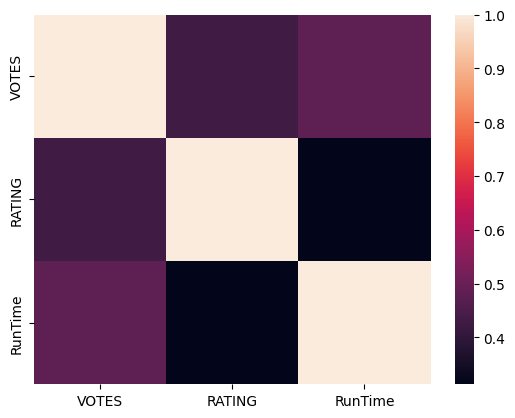

In [203]:
# Correlation map of Original_gross_filled
numeric_df = Originally_gross_filled_rows.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr())
plt.show()


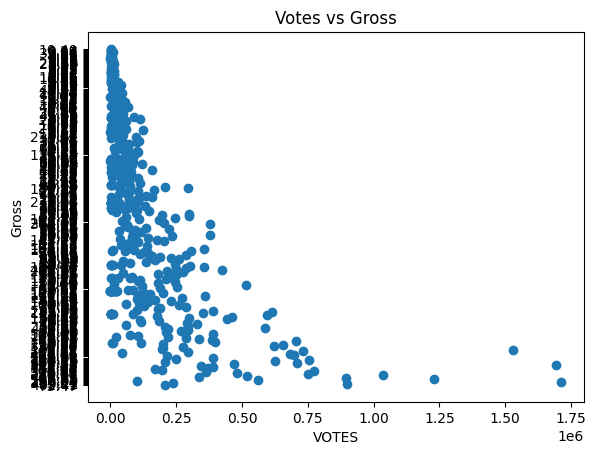

In [205]:
# plot Original_filled_gross with votes
plt.title("Votes vs Gross")
plt.xlabel("VOTES")
plt.ylabel("Gross")
plt.scatter(Originally_gross_filled_rows['VOTES'],Originally_gross_filled_rows['Gross'])
plt.show()

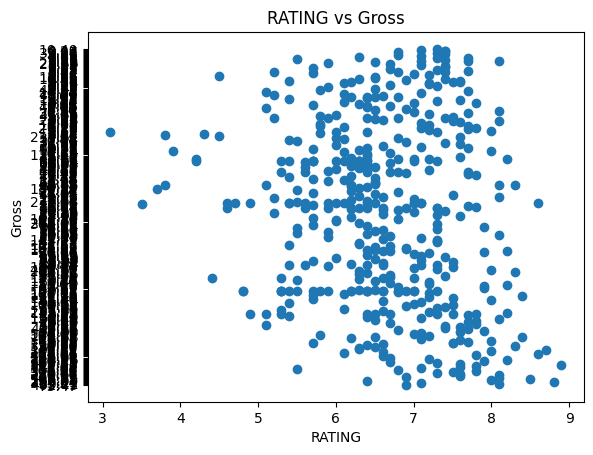

In [206]:
plt.title("RATING vs Gross")
plt.xlabel("RATING")
plt.ylabel("Gross")
plt.scatter(Originally_gross_filled_rows['RATING'],Originally_gross_filled_rows['Gross'])
plt.show()

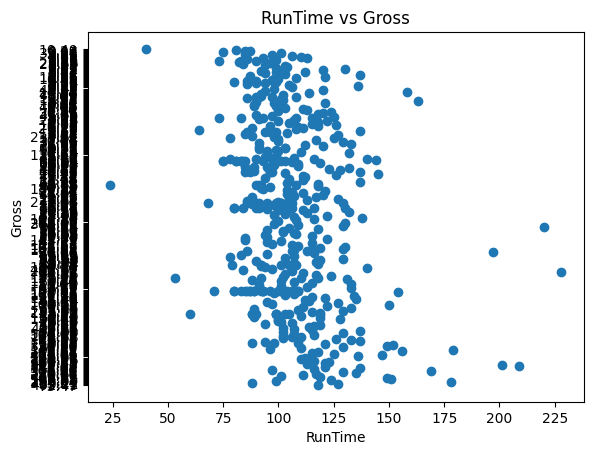

In [207]:
plt.title("RunTime vs Gross")
plt.xlabel("RunTime")
plt.ylabel("Gross")
plt.scatter(Originally_gross_filled_rows['RunTime'],Originally_gross_filled_rows['Gross'])
plt.show()